Goal: calculate the log=likelihood of $r_t$ given the states $\alpha_t$, namely $\log p(r_t| \alpha_t)$. To find this, assuming, gaussianity, we observe that the observed returns follow:

$$
r_t |\alpha_t=r_t|f_t,h_t \sim \mathcal{N}(\bm \Lambda f_t, \bm\Lambda \mathrm{diag}(e^{h_t})\bm\Lambda^\prime+\bm \Sigma_\epsilon))
$$
Applying the pdf of the multivariatenormal distribution, we have:
\begin{align}
p(r_t|\alpha_t)&=\frac{1}{(2\pi)^{N/2}| \Lambda \Sigma_{f,t}\Lambda^\prime+ \Sigma_\epsilon|^{1/2}}\exp\left(-\frac{1}{2}(r_t- \Lambda f_t)^\prime( \Lambda \Sigma_{f,t}\Lambda^\prime+\Sigma_\epsilon)^{-1}(r_t- \Lambda f_t)\right)\\
p(r_t|\alpha_t)& =\left(2 \pi\right)^{- \frac{N}{2}} \sqrt{\left|{\Lambda_{t} \Sigma_{f,t} \Lambda_{t}^{\prime} + \Sigma_{\epsilon}}\right|} e^{\left(-\frac{1}{2}(r_t- \Lambda f_t)^\prime( \Lambda \Sigma_{f,t}\Lambda^\prime+\Sigma_\epsilon)^{-1}(r_t- \Lambda f_t)\right)}\\
\log p(r_t|\alpha_t)&=-\frac{N}{2}\log(2)-\frac{N}{2}\log(\pi)  + \frac{\log{\left(\left|{\Lambda_{t} \Sigma_{f,t} \Lambda_{t}^{\prime} + \Sigma_{\epsilon}}\right| \right)}}{2}\\
&- \frac{1}{2} \left((r_t- \Lambda f_t)^\prime( \Lambda \Sigma_{f,t}\Lambda^\prime+\Sigma_\epsilon)^{-1}(r_t- \Lambda f_t)\right) \nonumber\\ 
\end{align}

p(r_t)


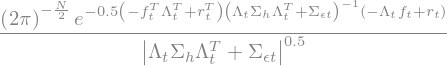

log p(r_t)


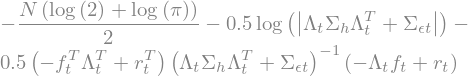

In [57]:
import sympy as sp
import numpy as np
from sympy.stats import MultivariateNormal,density,marginal_distribution
sp.init_printing()
# Define dimensions
N = sp.symbols('N', integer=True, positive=True)  # dimension of returns vector
# K = sp.symbols('K', integer=True, positive=True)  # number of factors
# N=3
K=2

# Define state vectors
r_t=sp.MatrixSymbol('r_t', N, 1)  # returns vector
f_t = sp.MatrixSymbol('f_t', K, 1)  # factors vector
h_t = sp.MatrixSymbol('h_t', K, 1)  # log-volatility vector

# Define matrices
Lambda_t = sp.MatrixSymbol('Lambda_t', N, K)  # factor loadings matrix
Sigma_epsilon_t = sp.MatrixSymbol('Sigma_epsilon_t', N, N)  # idiosyncratic error covariance matrix



# For convenience, define the covariance matrix
h_exp = sp.Matrix([sp.exp(h) for h in h_t])
# diag_exp_h = sp.diag(*h_exp)
diag_exp_h=sp.MatrixSymbol('Sigma_h', K, K)
mu=Lambda_t@f_t
Sigma_t = Lambda_t @ diag_exp_h @ Lambda_t.T + Sigma_epsilon_t

# Use proper matrix determinant calculation
p_r_t = (2*sp.pi)**(-N/2) * ((sp.Determinant(Sigma_t)))**(-1/2) * sp.exp(-1/2 * (r_t - mu).T @ Sigma_t.inverse() @ (r_t - mu))

print('p(r_t)')
display( p_r_t)
log_p_r_t = sp.log(p_r_t)
#Print pdf, and log-pdf
log_p_r_t = (sp.expand_log(log_p_r_t,deep=True,force=True))
print('log p(r_t)')
display((log_p_r_t))

In [46]:
sp.print_latex(p_r_t, mode='equation')
sp.print_latex(log_p_r_t, mode='equation')

\begin{equation}\left(2 \pi\right)^{- \frac{N}{2}} \sqrt{\left|{\Lambda_{t} \Sigma_{h} \Lambda_{t}^{T} + \Sigma_{\epsilon t}}\right|} e^{- 0.5 \left(- f_{t}^{T} \Lambda_{t}^{T} + r_{t}^{T}\right) \left(\Lambda_{t} \Sigma_{h} \Lambda_{t}^{T} + \Sigma_{\epsilon t}\right)^{-1} \left(- \Lambda_{t} f_{t} + r_{t}\right)}\end{equation}
\begin{equation}- \frac{N \left(\log{\left(2 \right)} + \log{\left(\pi \right)}\right)}{2} + \frac{\log{\left(\left|{\Lambda_{t} \Sigma_{h} \Lambda_{t}^{T} + \Sigma_{\epsilon t}}\right| \right)}}{2} - 0.5 \left(- f_{t}^{T} \Lambda_{t}^{T} + r_{t}^{T}\right) \left(\Lambda_{t} \Sigma_{h} \Lambda_{t}^{T} + \Sigma_{\epsilon t}\right)^{-1} \left(- \Lambda_{t} f_{t} + r_{t}\right)\end{equation}
